In [125]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [126]:
dataset = 'model/static_classifier/static_data.csv'
model_save_path = 'model/static_classifier/static_classifier.hdf5'
tflite_save_path = 'model/static_classifier/static_classifier.tflite'

# Set number of classes

In [127]:
NUM_CLASSES = 6

# Dataset reading

In [128]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [129]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [131]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [132]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_14 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                860       
_________________________________________________________________
dropout_15 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [134]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [135]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
55/55 [==============================] - 1s 8ms/step - loss: 1.7724 - accuracy: 0.2279 - val_loss: 1.6652 - val_accuracy: 0.3885

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
55/55 [==============================] - 0s 4ms/step - loss: 1.6004 - accuracy: 0.3337 - val_loss: 1.4608 - val_accuracy: 0.4403

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
55/55 [==============================] - 0s 5ms/step - loss: 1.4948 - accuracy: 0.3837 - val_loss: 1.3524 - val_accuracy: 0.4752

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
55/55 [==============================] - 0s 4ms/step - loss: 1.4217 - accuracy: 0.4139 - val_loss: 1.2573 - val_accuracy: 0.5545

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
55/55 [==============================] - 0s 6ms/step - loss: 1.3465 - accuracy: 0.4454 - val_lo


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.8211 - accuracy: 0.6763 - val_loss: 0.4846 - val_accuracy: 0.8969

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.8050 - accuracy: 0.6903 - val_loss: 0.4691 - val_accuracy: 0.9034

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
55/55 [==============================] - 0s 6ms/step - loss: 0.8009 - accuracy: 0.6834 - val_loss: 0.4754 - val_accuracy: 0.9271

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.8005 - accuracy: 0.6915 - val_loss: 0.4560 - val_accuracy: 0.9004

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
55/55 [==


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
55/55 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.7414 - val_loss: 0.3806 - val_accuracy: 0.9357

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
55/55 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.7349 - val_loss: 0.3864 - val_accuracy: 0.9340

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.7402 - val_loss: 0.3870 - val_accuracy: 0.9388

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
55/55 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.7332 - val_loss: 0.3797 - val_accuracy: 0.9431

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
55/5

In [136]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.9392


In [137]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [138]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.15485708 0.12690188 0.67820966 0.02090419 0.01180719 0.00731998]
2


# Confusion matrix

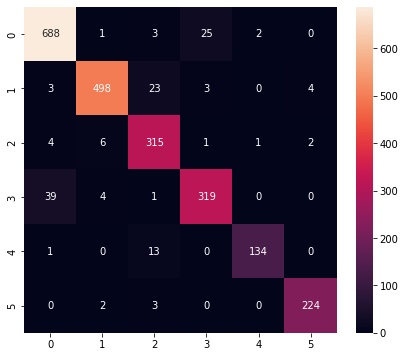

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       719
           1       0.97      0.94      0.96       531
           2       0.88      0.96      0.92       329
           3       0.92      0.88      0.90       363
           4       0.98      0.91      0.94       148
           5       0.97      0.98      0.98       229

    accuracy                           0.94      2319
   macro avg       0.94      0.94      0.94      2319
weighted avg       0.94      0.94      0.94      2319



In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [140]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [141]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Jeremy\AppData\Local\Temp\tmph_jxk0yf\assets


INFO:tensorflow:Assets written to: C:\Users\Jeremy\AppData\Local\Temp\tmph_jxk0yf\assets


6416

# Inference test

In [142]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [143]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [144]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [145]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [146]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.1548571  0.12690188 0.6782096  0.02090419 0.0118072  0.00731999]
2
